<a href="https://colab.research.google.com/github/c-njenga/dsc-git-intro/blob/master/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: Catherine Wanjiru Njenga
* Student pace: part time
* Scheduled project review date/time: 28/07/2023
* Instructor name: Samwel Jane / Veronica Isiaho
* Blog post URL:


## **ANALYSIS FOR MICROSOFT'S SUCCESS IN FILM PRODUCTION**






##  Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to collaborate with a movie studio, to create a movie but they are not sure which studio to invest in and which market to target. You are tasked with reviewing studio performances on the domestic and foreign markets, conducting extensive research and provide powerful insights to maximize profit.

## Project Overview
The primary goal of this project is to analyze movie earnings from domestic and foreign markets across various film studios. The analysis aims to provide actionable insights to advise on the optimal studios for investment and the most lucrative markets to target.

## Objectives of the study
- To identify the most popular genre of movie in terms of revenue earned.
- To identify which is the most profitable genre in both markets.
- To identify the studio that has the highest revenue in both markets.
- To identify the correlation between revenue generated from the two markets.


### Data Collection
Data will be gathered on the following key metrics:
- **Movie Earnings**: Total revenue from both domestic and foreign markets.
- **Studios**: Names of the film studios producing the movies.
- **Genre**: Genre of the movie produced.


## Data Cleaning and Preparation
Using various methods to handle the data so that to:
- Ensure data accuracy and completeness.
- Handle missing values and standardize formats.

## Understanding the data
Using various methods to get a full feel of the data.


In [1]:
# Start by importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Loading the first dataset
df1 = pd.read_csv('imdb.title.basics.csv.gz')
df1.head(500)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
495,tt0963292,Feast of the Assumption: BTK and the Otero Fam...,Feast of the Assumption: The Otero Family Murders,2010,86.0,"Crime,Documentary"
496,tt0963966,The Sorcerer's Apprentice,The Sorcerer's Apprentice,2010,109.0,"Action,Adventure,Family"
497,tt0964517,The Fighter,The Fighter,2010,116.0,"Biography,Drama,Sport"
498,tt0964544,Pushin' Up Daisies,Pushin' Up Daisies,2010,87.0,Comedy


In [3]:
# Load the data and view the what is contained to understand the dataset
df2 = pd.read_csv('bom.movie_gross.csv.gz')
df2.head(100)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
95,Secretariat,BV,59700000.0,537000,2010
96,The Ghost Writer,Sum.,15500000.0,44700000,2010
97,Morning Glory,Par.,31000000.0,29000000,2010
98,Remember Me,Sum.,19100000.0,37000000,2010


In [4]:
# Printing the shape to get the number or rows and columns
# The .info method give us the metadata of our dataset
print(df1.shape)
print(df1.info())
print(df2.shape)
print(df2.info())

(146144, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
(3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtyp

In [5]:
# To look at the last rows of the data
df1.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


## Renaming columns.
Renaming 'start_year' to 'year' and 'original_title' to 'title'

In [6]:
# Renaming the columns to enable merging
df1.rename(columns={'start_year': 'year'}, inplace=True)
print(df1.columns)

Index(['tconst', 'primary_title', 'original_title', 'year', 'runtime_minutes',
       'genres'],
      dtype='object')


In [7]:
df1.rename(columns={'original_title': 'title'}, inplace=True)
print(df1.columns)

Index(['tconst', 'primary_title', 'title', 'year', 'runtime_minutes',
       'genres'],
      dtype='object')


## Merging the datasets
Combining the two datasets to ensure the accuracy and completeness of the data.

In [8]:
# Merging the 2 datasets into one
df = pd.merge(df1,df2, how ='inner', on =['year','title'] )
print(df.shape)
print(df.info())


(1666, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1666 non-null   object 
 1   primary_title    1666 non-null   object 
 2   title            1666 non-null   object 
 3   year             1666 non-null   int64  
 4   runtime_minutes  1656 non-null   float64
 5   genres           1664 non-null   object 
 6   studio           1664 non-null   object 
 7   domestic_gross   1656 non-null   float64
 8   foreign_gross    1199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 117.3+ KB
None


# Cleaning the merged data
First we will start by droping the columns that are not in use, then we fill in the missing values

In [9]:
# Dropping the columns from df that are not necessary
df = df.drop(['tconst','primary_title','runtime_minutes'], axis = 1)
print(df.columns)

Index(['title', 'year', 'genres', 'studio', 'domestic_gross', 'foreign_gross'], dtype='object')


In [10]:
# Visualizing the metadata of our new dataframe
print(df.shape)
print(df.info())

(1666, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1666 non-null   object 
 1   year            1666 non-null   int64  
 2   genres          1664 non-null   object 
 3   studio          1664 non-null   object 
 4   domestic_gross  1656 non-null   float64
 5   foreign_gross   1199 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 78.2+ KB
None


Cleaning the year column

In [11]:
df['year']

0       2016
1       2012
2       2013
3       2014
4       2015
        ... 
1661    2018
1662    2018
1663    2018
1664    2018
1665    2018
Name: year, Length: 1666, dtype: int64

In [12]:
from typing import ForwardRef
df['year'] = pd.to_datetime(df['year'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1666 non-null   object        
 1   year            1666 non-null   datetime64[ns]
 2   genres          1664 non-null   object        
 3   studio          1664 non-null   object        
 4   domestic_gross  1656 non-null   float64       
 5   foreign_gross   1199 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 78.2+ KB
None


In [13]:
# Looking for mising values
df.isnull().sum()

title               0
year                0
genres              2
studio              2
domestic_gross     10
foreign_gross     467
dtype: int64

## Cleaning data
Replacing the missing values with the median. The median is used as it is less affected by the outliers if any.

Cleaning the genres column

In [14]:
# Filling missing values with .fillna
df['genres'].fillna("other", inplace = True)
print(df['genres'].isnull().sum())

0


Cleaning the studio column

In [15]:
df['studio'].fillna("unknown", inplace = True)
print(df['studio'].isnull().sum())

0


Cleaning the domestic_gross column with the median

In [16]:
df['domestic_gross'].fillna(df['domestic_gross'].median(), inplace = True)
print(df['domestic_gross'].isnull().sum())

0


In [17]:
# Changeing data type to interger
df['domestic_gross'] = df['domestic_gross'].astype(float).astype(int)

Cleaning the foreign_gross column with the median

In [18]:
print(df['foreign_gross'].head(100))

0           NaN
1       8000000
2     129900000
3      26900000
4       1,019.4
        ...    
95       123000
96    718100000
97    230100000
98      2900000
99    187900000
Name: foreign_gross, Length: 100, dtype: object


In [19]:
# Removing the comma to enable converting the data type
df['foreign_gross'] = df['foreign_gross'].str.replace(',','')

In [20]:
df['foreign_gross'].fillna(df['foreign_gross'].median(), inplace = True)
print(df['foreign_gross'].isnull().sum())

0


In [21]:
# Converting data type
df['foreign_gross'] = df['foreign_gross'].astype(str).astype(float)

In [22]:
# converting data type
df['foreign_gross'] = df['foreign_gross'].astype(float).astype(int)

In [23]:
# Confirming that all data has no missing values
df.isnull().sum()

title             0
year              0
genres            0
studio            0
domestic_gross    0
foreign_gross     0
dtype: int64

Exploring the data after cleaning



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           1666 non-null   object        
 1   year            1666 non-null   datetime64[ns]
 2   genres          1666 non-null   object        
 3   studio          1666 non-null   object        
 4   domestic_gross  1666 non-null   int64         
 5   foreign_gross   1666 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 78.2+ KB


The most popular genre in terms of frequency

In [25]:
# creating a fuction to get the frequence of movie genres
def total_count(movie_genre):
  total_count = df['genres'].str.title().value_counts()
  return total_count

In [26]:
popular_gen = total_count(df)
print(popular_gen)

genres
Comedy,Drama,Romance             88
Drama                            76
Adventure,Animation,Comedy       67
Comedy,Drama                     61
Comedy                           55
                                 ..
Animation,Family                  1
Horror,Mystery                    1
Mystery,Thriller                  1
Action,Adventure,Mystery          1
Biography,Documentary,History     1
Name: count, Length: 246, dtype: int64


Visualizing the most popular genre on a barchart

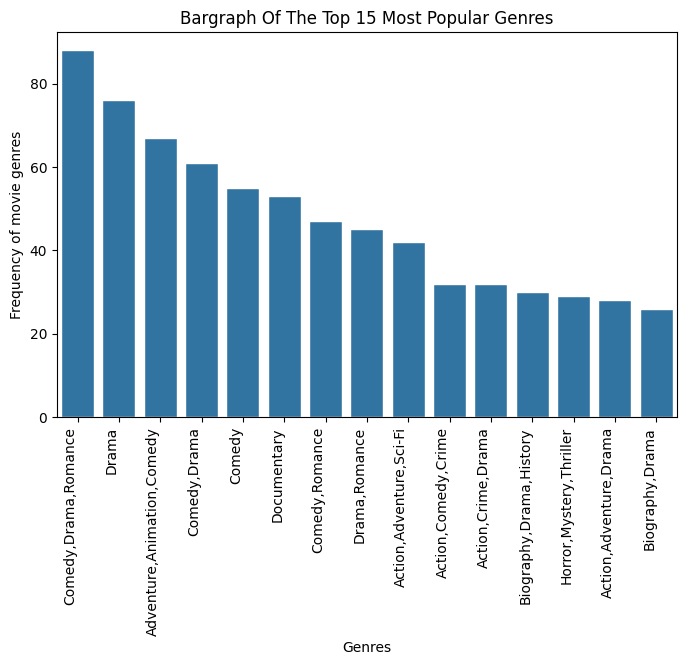

In [27]:
top_15 = popular_gen.head(15)
plt.subplots(figsize =(8,5))
sns.set_theme(style="darkgrid")
sns.barplot(x=top_15.index, y=top_15.values)
plt.xlabel('Genres')
plt.ylabel('Frequency of movie genres')
plt.title('Bargraph Of The Top 15 Most Popular Genres')
plt.xticks(rotation = 90, ha= 'right');

From the results 'Comedy,Drama,Romance' is the most popular genre followed by 'Drama'.

## Visualizing the most lucrative genre across the Domestic and Foreign Market
By analyzing the revenue from each market in terms of popular genre, I can get the best market to invest in

In [28]:
# Grouping by genres and looking for the mean of each group
pop_domestic = df.groupby('genres')['domestic_gross'].mean().sort_values(ascending = False)
print(pop_domestic)

genres
Action,Adventure,Sci-Fi       2.352381e+08
Adventure,Drama,Sci-Fi        2.082000e+08
Adventure,Fantasy             1.929000e+08
Biography,Drama,Musical       1.743000e+08
Action,Adventure,Animation    1.546657e+08
                                  ...     
Action,Drama,War              1.750000e+04
Documentary,History,News      1.320000e+04
Adventure,Drama,History       5.500000e+03
Comedy,Crime,Mystery          5.000000e+03
Fantasy,Thriller              1.400000e+03
Name: domestic_gross, Length: 246, dtype: float64


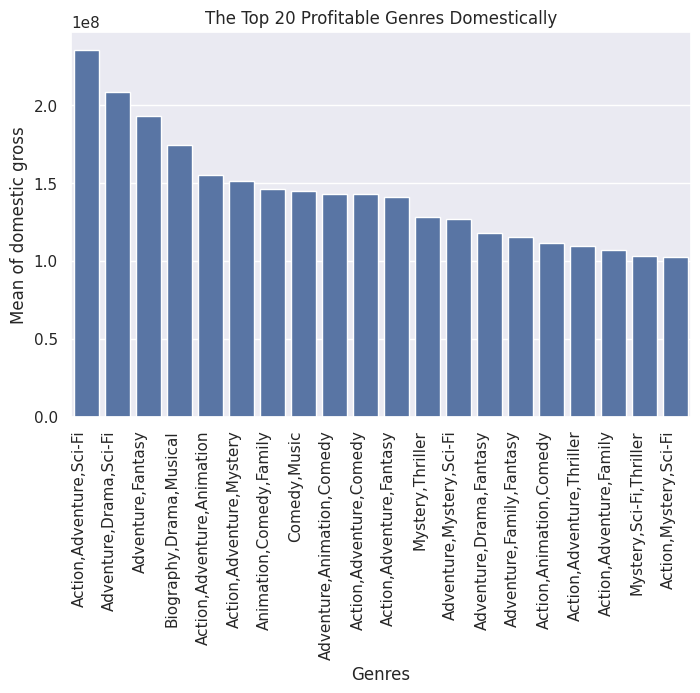

In [29]:
# Bar graph to show the findings
top20_genre = pop_domestic.head(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=top20_genre.index,y=top20_genre.values)
plt.xlabel('Genres')
plt.ylabel('Mean of domestic gross')
plt.title('The Top 20 Profitable Genres Domestically')
plt.xticks(rotation = 90, ha= 'right');

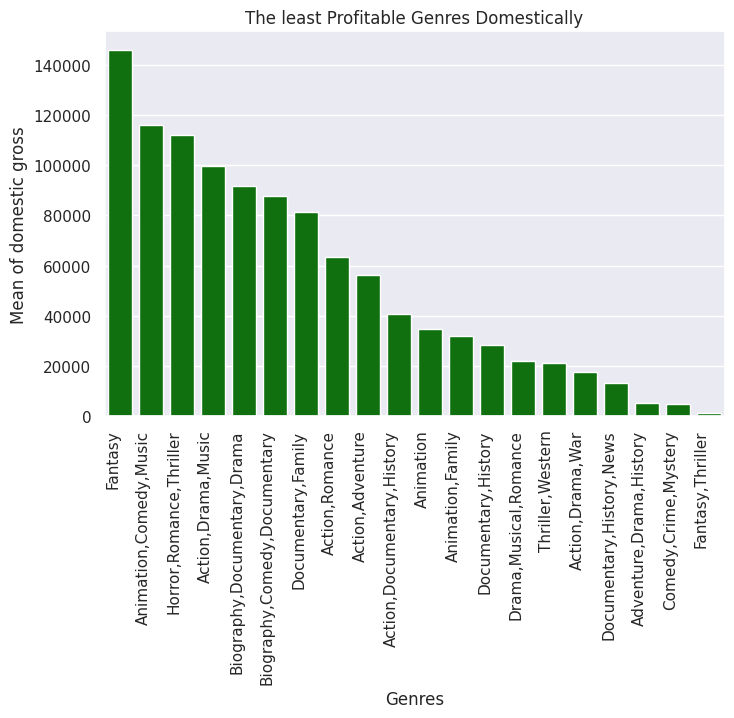

In [30]:
# plotting the last genres
last20_genre = pop_domestic.tail(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=last20_genre.index,y=last20_genre.values,color="green")
plt.xlabel('Genres')
plt.ylabel('Mean of domestic gross')
plt.title('The least Profitable Genres Domestically')
plt.xticks(rotation = 90, ha= 'right');

In [31]:
# Grouping by genres and looking for the mean of each group
pop_foreign = df.groupby('genres')['foreign_gross'].mean().sort_values(ascending=False)
print(pop_foreign)

genres
Adventure,Fantasy                 5.111333e+08
Adventure,Drama,Sci-Fi            4.455500e+08
Action,Adventure,Sci-Fi           3.587786e+08
Action,Adventure,Animation        2.958000e+08
Action,Adventure,Fantasy          2.950654e+08
                                      ...     
Thriller,Western                  3.000000e+05
Documentary,Drama,Mystery         2.420000e+05
Biography,Documentary,Thriller    2.020000e+05
Documentary,War                   1.025000e+05
Comedy,Documentary                7.400000e+04
Name: foreign_gross, Length: 246, dtype: float64


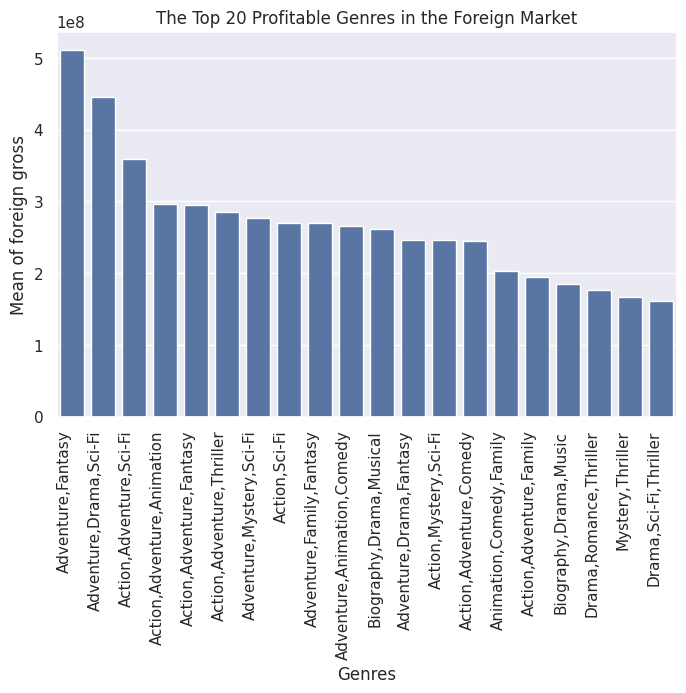

In [32]:
# Plotting the top popular genres for the foreign market
top20_genre = pop_foreign.head(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=top20_genre.index,y=top20_genre.values)
plt.xlabel('Genres')
plt.ylabel('Mean of foreign gross')
plt.title('The Top 20 Profitable Genres in the Foreign Market')
plt.xticks(rotation = 90, ha= 'right');

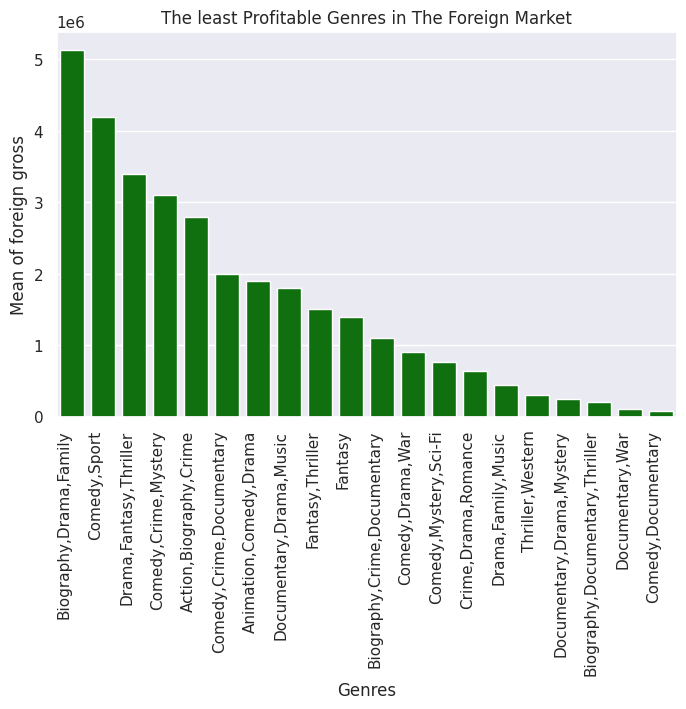

In [33]:
# Plotting the least popular genre
last20_genre = pop_foreign.tail(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=last20_genre.index,y=last20_genre.values,color="green")
plt.xlabel('Genres')
plt.ylabel('Mean of foreign gross')
plt.title('The least Profitable Genres in The Foreign Market')
plt.xticks(rotation = 90, ha= 'right');

In [34]:
# Grouping by studio and looking for the mean of each group
pro_studio = df.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False)
print(pro_studio)

studio
P/DW        3.393600e+08
BV          2.432068e+08
GrtIndia    2.340000e+08
Fox         1.530059e+08
WB (NL)     1.408810e+08
                ...     
Viv.        6.030000e+04
First       5.360000e+04
ATO         4.070000e+04
WOW         1.860000e+04
FOAK        1.730000e+04
Name: foreign_gross, Length: 152, dtype: float64


In [35]:
# Grouping by studio and looking for the mean of each group
prof_studio = df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)
print(prof_studio)

studio
P/DW        1.682900e+08
BV          1.615556e+08
WB (NL)     9.062619e+07
WB          9.048641e+07
Uni.        8.727853e+07
                ...     
P4          8.500000e+03
Crnth       6.200000e+03
Distrib.    5.600000e+03
First       2.000000e+03
Shout!      1.500000e+03
Name: domestic_gross, Length: 152, dtype: float64


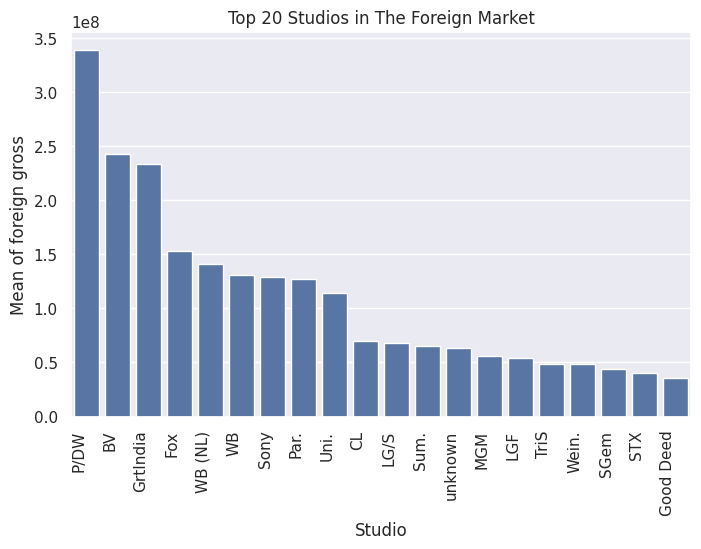

In [36]:
# Plotting the top studio
top_for_studio = pro_studio.head(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=top_for_studio.index,y=top_for_studio.values)
plt.xlabel('Studio')
plt.ylabel('Mean of foreign gross')
plt.title('Top 20 Studios in The Foreign Market')
plt.xticks(rotation = 90, ha= 'right');

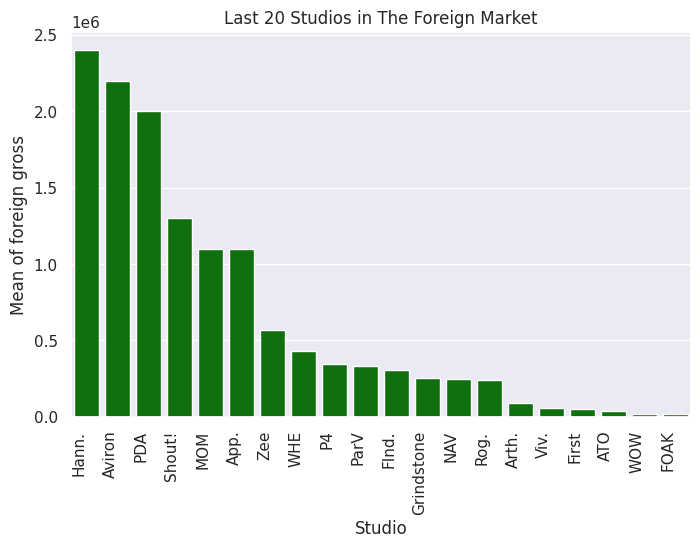

In [37]:
# Plotting the least popular studio
last_for_studio = pro_studio.tail(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=last_for_studio.index,y=last_for_studio.values, color="green")
plt.xlabel('Studio')
plt.ylabel('Mean of foreign gross')
plt.title('Last 20 Studios in The Foreign Market')
plt.xticks(rotation = 90, ha= 'right');

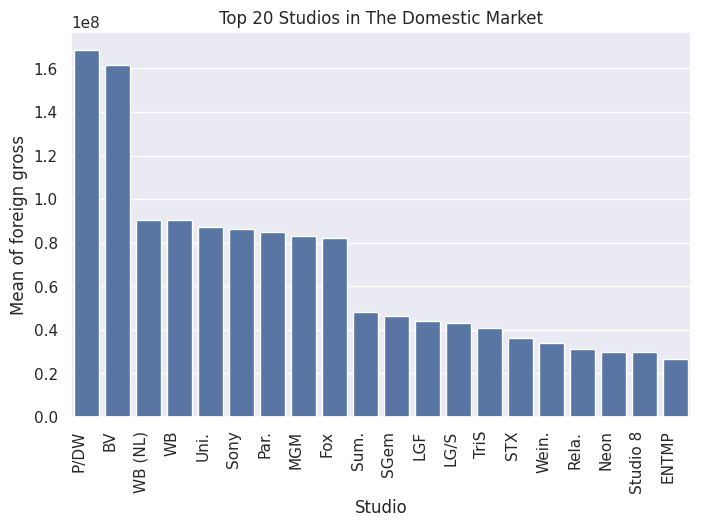

In [38]:
#Plotting the top studio domestically
top_dom_studio = prof_studio.head(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=top_dom_studio.index,y=top_dom_studio.values)
plt.xlabel('Studio')
plt.ylabel('Mean of foreign gross')
plt.title('Top 20 Studios in The Domestic Market')
plt.xticks(rotation = 90, ha= 'right');

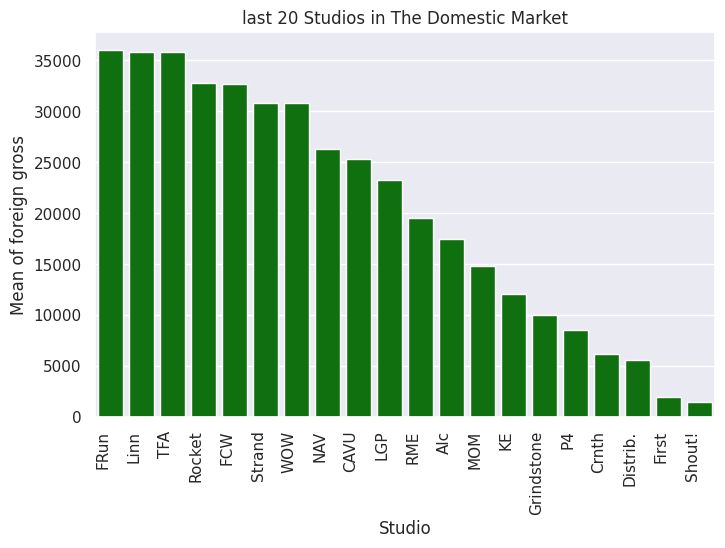

In [39]:
# Plotting the least popular studio domestically
last_dom_studio = prof_studio.tail(20)
sns.set_theme(style="darkgrid")
plt.subplots(figsize=(8,5))
sns.barplot(x=last_dom_studio.index,y=last_dom_studio.values,color="green")
plt.xlabel('Studio')
plt.ylabel('Mean of foreign gross')
plt.title('last 20 Studios in The Domestic Market')
plt.xticks(rotation = 90, ha= 'right');

## The correlation between genres, studios, foreign gross and domestic gross
We are looking to see if there is any relationship between genre and studio, studio and revenue collected domestically and internationally, and the relationship between genre and revenue.


In [40]:
corr_data = df[['domestic_gross','foreign_gross']]
corr_data

,domestic_gross,foreign_gross
0,1100000,30000000
1,744000,8000000
2,58200000,129900000
3,26300000,26900000
4,652300000,1019
...,...,...
1661,1200000,30000000
1662,365000,30000000
1663,72000,30000000
1664,37700,30000000


In [41]:
corr_data.corr()

,domestic_gross,foreign_gross
domestic_gross,1.0000,0.8124
foreign_gross,0.8124,1.0000


This shows there is a strong positive correlation between movie revenue across the two markets.
If a movie performs well domestically then it will most likely perform well internationally

Correlation matrix

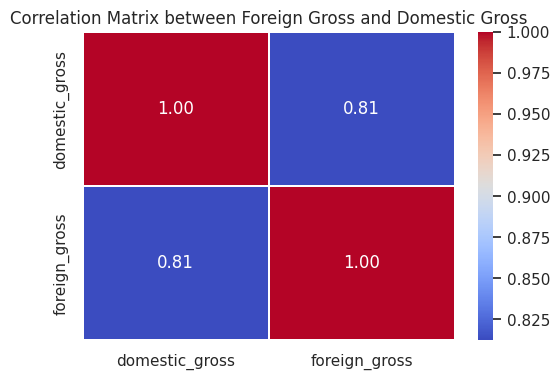

In [42]:
# Plotting a correlation matrix
corr = corr_data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr,annot=True,fmt="0.2f",cmap="coolwarm",linewidths=0.3)
plt.title('Correlation Matrix between Foreign Gross and Domestic Gross')
plt.show()

## Conclusion
From our analysis, we can conclude that:
1.   The most popular genre of movies produced are 'Comedy,Drama,Romance', 'Drama,Adventure,Animation' and 'Comedy'
2. The most lucrative Genres Domestically are 'Action,Adventure,Sci-Fi', 'Adventure,Drama,Sci-fi' and
 'Adventure,Fantasy', and the least lucrative is 'Fantasy,Thriller'.
3. The most lucrative Genres Internationally are 'Adventure,Fantasy', 'Adventure,Drama,Sci-Fi' and 'Action,Adventure,Sci-Fi, and the least 'Comedy,Documentary,
4. The studios with the highest profit from both the domestic and foreign markets are P/DW and BV.
5. To maximize on profit from the two markets the genres to be produced are 'Action,Adventure,Sci-Fi and 'Adventure,Drama,Sci-Fi'.


## Recommendations.
Based on the analysis it is recommended that;

1. **Best Studio to invest in is** P/DW as it has the highest profit from both markets.
2.  **The most Profitable Genre For the Domestic audience,** is the genre with the highest revenue domestically is 'Action,Adventure,Sci-Fi' followed by 'Adventure,Drama,Sci-Fi. Microsoft should invest in these two genres for domestic audiences.
3. **The most profitable Genre for the foreign audience**,is the genre with the highest revenue internationally which is 'Adventure,Fantasy, followed by 'Adventure,Drama,Sci-fi showing that if the films from these genres when produced they will become a big hit internationally.


